In [1]:
import os, re, glob 
import cv2 
import numpy as np 
from sklearn.model_selection import train_test_split

In [2]:
imagePath = 'img'
categories = ["cheyoung","dahyeon","jeongyeon","jihyo","mina","momo","sana", "nayeon","tzuyu"]
nb_classes = len(categories)

In [3]:
image_w = 100
image_h = 100

X = []
Y = []

for idx, ain in enumerate(categories): 
    label = [0 for i in range(nb_classes)] 
    label[idx] = 1 
    image_dir = imagePath+'/'+ain+'/'
   
    for top, dir, f in os.walk(image_dir): 
        for filename in f: 
#             print(image_dir+filename) 
            img = cv2.imread(image_dir+filename) 
#             img = cv2.resize(img, None, fx=100/img.shape[1], fy=100/img.shape[0]) 
            X.append(img/256) 
            Y.append(label)

X = np.array(X) 
Y = np.array(Y) 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2) 
xy = (X_train, X_test, Y_train, Y_test) 
            

In [4]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

In [5]:
import cv2
import os, glob
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib


In [6]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

Using TensorFlow backend.


In [7]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [8]:
from tensorflow.keras import models

In [10]:
X_train

array([[[[0.19140625, 0.16015625, 0.1328125 ],
         [0.19140625, 0.16015625, 0.1328125 ],
         [0.19921875, 0.16015625, 0.1328125 ],
         ...,
         [0.2421875 , 0.1875    , 0.2109375 ],
         [0.26171875, 0.20703125, 0.23046875],
         [0.3125    , 0.2578125 , 0.28125   ]],

        [[0.1796875 , 0.1484375 , 0.12109375],
         [0.1875    , 0.15625   , 0.12890625],
         [0.203125  , 0.1640625 , 0.13671875],
         ...,
         [0.2421875 , 0.1875    , 0.2109375 ],
         [0.265625  , 0.2109375 , 0.234375  ],
         [0.32421875, 0.26953125, 0.29296875]],

        [[0.203125  , 0.16796875, 0.15234375],
         [0.1953125 , 0.16015625, 0.14453125],
         [0.18359375, 0.14453125, 0.1171875 ],
         ...,
         [0.234375  , 0.1796875 , 0.1953125 ],
         [0.26171875, 0.20703125, 0.23046875],
         [0.31640625, 0.26171875, 0.28515625]],

        ...,

        [[0.19140625, 0.15625   , 0.140625  ],
         [0.19140625, 0.15625   , 0.140625  ]

In [11]:
_,d_x,d_y,d_z=X_train.shape

In [12]:
import cv2
import os, glob
import numpy as np
import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import datasets, utils, losses, optimizers, metrics
from tensorflow.keras import models, layers, activations

In [13]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(d_x,d_y,d_z), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same",activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(Y_train.shape[1], activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)            

In [21]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 22470 samples, validate on 5618 samples
Epoch 1/10
22470/22470 [==============================] - 181s 8ms/step - loss: 0.3206 - accuracy: 0.8924 - val_loss: 0.2792 - val_accuracy: 0.9001
Epoch 2/10
22470/22470 [==============================] - 181s 8ms/step - loss: 0.2493 - accuracy: 0.9099 - val_loss: 0.2180 - val_accuracy: 0.9217
Epoch 3/10
22470/22470 [==============================] - 180s 8ms/step - loss: 0.1979 - accuracy: 0.9279 - val_loss: 0.1699 - val_accuracy: 0.9407
Epoch 4/10
22470/22470 [==============================] - 181s 8ms/step - loss: 0.1595 - accuracy: 0.9420 - val_loss: 0.1450 - val_accuracy: 0.9494
Epoch 5/10
22470/22470 [==============================] - 180s 8ms/step - loss: 0.1349 - accuracy: 0.9509 - val_loss: 0.1282 - val_accuracy: 0.9558
Epoch 6/10
22470/22470 [==============================] - 180s 8ms/step - loss: 0.1182 - accuracy: 0.9567 - val_loss: 0.1207 - val_accuracy: 0.9589
Epoch 7/10
2247

In [ ]:
from keras.models import load_model

In [ ]:
model.save('face_v1.h5')

In [17]:
from keras.models import load_model

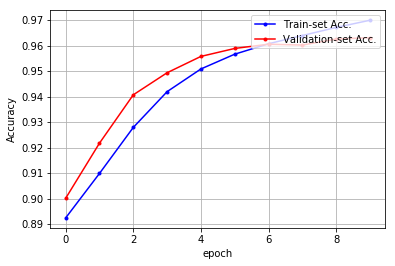

In [24]:
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()